In [1]:
import pickle
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
#import dataframe
with open('processed_df.pickle', 'rb') as data:
    df = pickle.load(data)
    
# import train features
with open('train_features.pickle', 'rb') as data:
     train_features = pickle.load(data)

# import train labels
with open('train_labels.pickle', 'rb') as data:
     train_labels = pickle.load(data)
        
# import test features
with open('test_features.pickle', 'rb') as data:
     test_features = pickle.load(data)
        
# import test labels
with open('test_labels.pickle', 'rb') as data:
     test_labels = pickle.load(data)
        
# import tfidf
with open('tfidf.pickle', 'rb') as data:
     tfidf = pickle.load(data)
        

In [4]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
train_features1, train_labels1 = oversample.fit_resample(train_features, train_labels)

In [5]:
mnb_classifier = MultinomialNB()

In [6]:
mnb_classifier.fit(train_features1, train_labels1)

MultinomialNB()

In [7]:
mnb_prediction = mnb_classifier.predict(test_features)

In [8]:
training_accuracy = accuracy_score(train_labels, mnb_classifier.predict(train_features))
print(training_accuracy)

0.8842436974789916


In [9]:
testing_accuracy = accuracy_score(test_labels, mnb_prediction)
print(testing_accuracy)

0.8725490196078431


In [10]:
print(classification_report(test_labels, mnb_prediction))

              precision    recall  f1-score   support

          -1       0.19      0.70      0.31        54
           0       0.02      0.10      0.04        21
           1       0.99      0.89      0.94      1965

    accuracy                           0.87      2040
   macro avg       0.40      0.56      0.43      2040
weighted avg       0.96      0.87      0.91      2040



In [11]:
conf_matrix = confusion_matrix(test_labels, mnb_prediction)
print(conf_matrix)

[[  38    9    7]
 [  10    2    9]
 [ 147   78 1740]]


In [12]:
with open('mnb_classifier.pickle','wb') as data:
    pickle.dump(mnb_classifier, data)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),

    SGDClassifier(),
    PassiveAggressiveClassifier()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, train_features1, train_labels1, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

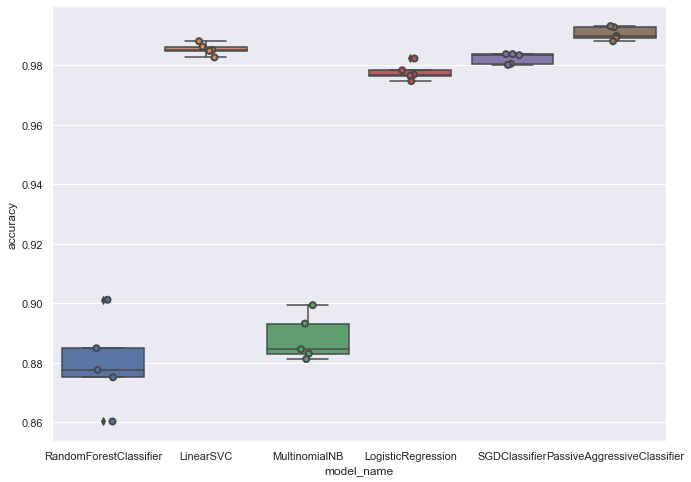

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=6, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [15]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                      0.985372
LogisticRegression             0.977696
MultinomialNB                  0.888262
PassiveAggressiveClassifier    0.990586
RandomForestClassifier         0.879788
SGDClassifier                  0.982258
Name: accuracy, dtype: float64

## Trying on Linear SVC

In [16]:
from sklearn.svm import LinearSVC

In [17]:
linear = LinearSVC()

In [18]:
linear.fit(train_features1, train_labels1)

LinearSVC()

In [19]:
linear_prediction = linear.predict(test_features)

In [20]:
training_accuracy = accuracy_score(train_labels, linear.predict(train_features))
print(training_accuracy)

0.973109243697479


In [21]:
testing_accuracy = accuracy_score(test_labels, linear_prediction)
print(testing_accuracy)

0.9377450980392157


In [22]:
conf_matrix = confusion_matrix(test_labels, linear_prediction)
print(conf_matrix)

[[  24    7   23]
 [   7    3   11]
 [  48   31 1886]]


In [23]:
print(classification_report(test_labels, linear_prediction))

              precision    recall  f1-score   support

          -1       0.30      0.44      0.36        54
           0       0.07      0.14      0.10        21
           1       0.98      0.96      0.97      1965

    accuracy                           0.94      2040
   macro avg       0.45      0.52      0.48      2040
weighted avg       0.95      0.94      0.95      2040



In [24]:
with open('linear_classifier.pickle','wb') as data:
    pickle.dump(linear, data)